# Groundwater Flow Modeling at the University at Buffalo
Lab 3: Laplace Equation and simulating the 2D Toth Problem


## Objective:
Develop a 2D finite difference code to represent Toth’s classic groundwater flow profile.


## Problem:

Last week we looked at solving a simple 1D groundwater flow problem using a finite difference approach applied to a Darcy column.  This week we are going to build upon what you learned and try our hand at a steady-state 2D problem simulating Toth’s classic groundwater flow profile.  Toth solved this problem analytically but today we are going to solve it using our newly developed finite difference approach.  If you remember back to what Toth did, he set up a 2D model domain with a constant head boundary on the top of the model and no flow boundaries on the sides and bottom (Figure 1)


![alt text](Toth_model_domain.png "Title")

The figure above represents a cross-section through a regional flow model.  We are going to use Matlab to discretize this model into 6 rows and 11 columns, please assume we are dealing with a mesh-centered model.  Remember from class that you are going to have to deal with the no flow boundary conditions in a little bit different way than you did last week with the constant head boundaries.  For this problem we are going to assume that the constant head boundary at the top of the model has a slope represented by the equation h=0.05x+100.  The other deference from last week’s problem is that we are going from 1D to 2D, which really does not end up being a big problem.
	
    
In the Darcy column code you have a good base to start from in terms of setting up the finite difference solution.  The iteration scheme is going to work the same way as it did before but you are going to need to add a second coordinate direction (use Gauss-Seidel iteration scheme from class).  This can be done by creating a nested “for” loop, which means placing a “for” loop inside of another “for” loop.  You are also going to have to deal with these new boundary conditions (i.e. both Dirchlet and Neumann).  


### Part I

As stated above in the first part of this lab we are going to assume that the water table is represented by the function h=0.05x + 100.  The bottom and side boundaries are represented by no flow conditions as shown in Figure 1.  It is your job to set up a grid of 6 rows by 11 columns (assume each cell is 20m x 20 m) that will solve the Toth problem.  We will assume that the convergence criteria (i.e. maximum change) should be around 0.001 meters.  If you did not have a convergence criteria function written into you code from last week now is the time add it into your code.  Even though this is still a relatively simple model the convergence criteria will make your model more efficient.  


In [1]:
import numpy as np

#Defining the number of rows and columns
rows = 6
columns = 11

#buliding the model domain
model_domain = np.zeros((rows,columns))

#This defines the top constant head boundary conditions
for top_bound in range(columns):
    model_domain[0][top_bound] = 0.05*top_bound*20 +100


#Here is where we run the model
stop = True

model_last = model_domain.copy()


while stop:
    
    for col_loc in range(1,columns-1):
        for row_loc in range (1,rows-1):
              model_domain[row_loc][col_loc] = (model_domain[row_loc - 1][col_loc] + model_domain[row_loc + 1][col_loc] + 
                                        model_domain[row_loc][col_loc - 1] + model_domain[row_loc][col_loc + 1])/4
                
    #This defines the side no flow boundaries - these must be updated ever iteration
    for side_bound in range (1,rows):
        model_domain[side_bound][0] = model_domain[side_bound][1]
        model_domain[side_bound][10] = model_domain[side_bound][9]

    #This defines the bottom no flow boundaries - these must be updated ever iteration
    for bottom_bound in range (columns):
        model_domain[5][bottom_bound] = model_domain[4][bottom_bound]    
                
                           
#Stopping mechanism for iteration 

    #Finding the Change in head
    delta_head = abs(model_domain-model_last)

    #This is the convergence criteria for the model
    cc = 0.001

    #Evaluating if the convergence criteria has been met
    test_cc = (delta_head <= np.full((rows,columns),cc)).all()
    
    if test_cc:
        stop = False
    else:
        model_last = model_domain.copy()
    
model_domain

array([[100.        , 101.        , 102.        , 103.        ,
        104.        , 105.        , 106.        , 107.        ,
        108.        , 109.        , 110.        ],
       [102.20700602, 102.20700602, 102.70730925, 103.40234751,
        104.18169176, 104.99429097, 105.80685182, 106.58608059,
        107.28092521, 107.78095486, 107.78095486],
       [102.91506058, 102.91506058, 103.22083562, 103.72130481,
        104.33101455, 104.98948273, 105.64788021, 106.25737723,
        106.7574897 , 107.06276075, 107.06276075],
       [103.31949239, 103.31949239, 103.54109938, 103.93239902,
        104.43291226, 104.98604359, 105.53908112, 106.03931208,
        106.43013835, 106.65107654, 106.65107654],
       [103.5049992 , 103.5049992 , 103.69340396, 104.03594802,
        104.48380723, 104.98427169, 105.48463042, 105.93217151,
        106.2741821 , 106.46183316, 106.46183316],
       [103.5049992 , 103.5049992 , 103.69340396, 104.03594802,
        104.48380723, 104.98427169, 105.4

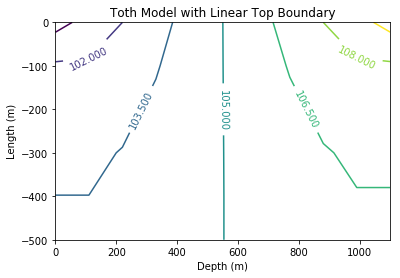

In [3]:
import matplotlib.pyplot as plt

#Creating a Grid to plot water levels
xlist = np.linspace(0, 1100, 11)
ylist = np.linspace(0, -500, 6)
X, Y = np.meshgrid(xlist, ylist)
Z = model_domain

#Plotting the water levels
plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Toth Model with Linear Top Boundary')
plt.xlabel('Depth (m)')
plt.ylabel('Length (m)')
plt.show()


The mass balance error is 1.363146179205239%


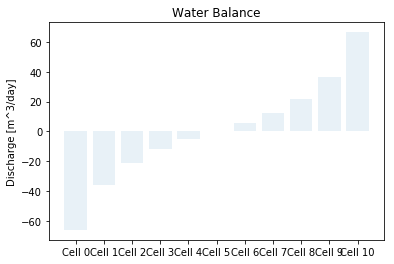

In [4]:
k = 30 #units meters/day
aquifer_thickness = 1 # units meters
discharge_cell = [0,1,2,3,4,5,6,7,8,9,10]

#Mass Balance
for waterbalance_cell in range(columns):
    discharge_cell[waterbalance_cell] = k*(model_domain[0][waterbalance_cell]-
                                           model_domain[1][waterbalance_cell])/100*(aquifer_thickness*100)
total_discharge = sum(discharge_cell)

#Percentage Error
water_budget_precentage_error = (100*total_discharge)/(sum(map(abs,discharge_cell))/2)
print(f'\nThe mass balance error is {water_budget_precentage_error}%')

#Graphing in flows and out flows
objects = ('Cell 0', 'Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Cell 9', 'Cell 10')
y_pos = [0,1,2,3,4,5,6,7,8,9,10]


plt.bar(y_pos, discharge_cell, align='center', alpha=0.1)
plt.xticks(y_pos, objects)
plt.ylabel('Discharge [m^3/day]')
plt.title('Water Balance')

plt.show()

### Part II

In the second part of this lab we are simply going to change the slope of the water table to 0.02.  The rest of the boundary conditions will remain no flow boundaries.


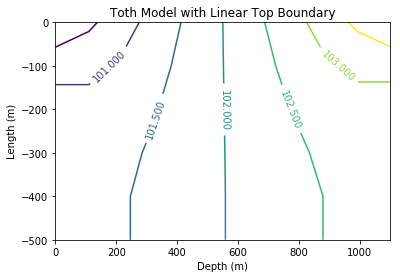

In [23]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the number of rows and columns
rows = 6
columns = 11

#buliding the model domain
model_domain = np.zeros((rows,columns))

#This defines the top constant head boundary conditions
for top_bound in range(columns):
    model_domain[0][top_bound] = 0.02*top_bound*20 +100


#Here is where we run the model
stop = True

model_last = model_domain.copy()


while stop:
    
    for col_loc in range(1,columns-1):
        for row_loc in range (1,rows-1):
              model_domain[row_loc][col_loc] = (model_domain[row_loc - 1][col_loc] + model_domain[row_loc + 1][col_loc] + 
                                        model_domain[row_loc][col_loc - 1] + model_domain[row_loc][col_loc + 1])/4
                
    #This defines the side no flow boundaries - these must be updated ever iteration
    for side_bound in range (1,rows):
        model_domain[side_bound][0] = model_domain[side_bound][1]
        model_domain[side_bound][10] = model_domain[side_bound][9]

    #This defines the bottom no flow boundaries - these must be updated ever iteration
    for bottom_bound in range (columns):
        model_domain[5][bottom_bound] = model_domain[4][bottom_bound]    
                
                           
#Stopping mechanism for iteration 

    #Finding the Change in head
    delta_head = abs(model_domain-model_last)

    #This is the convergence criteria for the model
    cc = 0.001

    #Evaluating if the convergence criteria has been met
    test_cc = (delta_head <= np.full((rows,columns),cc)).all()
    
    if test_cc:
        stop = False
    else:
        model_last = model_domain.copy()


#Creating a Grid to plot water levels
xlist = np.linspace(0, 1100, 11)
ylist = np.linspace(0, -500, 6)
X, Y = np.meshgrid(xlist, ylist)
Z = model_domain

#Plotting the water levels
plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Toth Model with Linear Top Boundary')
plt.xlabel('Depth (m)')
plt.ylabel('Length (m)')
plt.show()    


In [6]:
model_domain

array([[100.        , 100.4       , 100.8       , 101.2       ,
        101.6       , 102.        , 102.4       , 102.8       ,
        103.2       , 103.6       , 104.        ],
       [100.87901135, 100.87901135, 101.07930563, 101.35746623,
        101.6693237 , 101.99445956, 102.31955819, 102.63130359,
        102.90927627, 103.10930505, 103.10930505],
       [101.15904027, 101.15904027, 101.28166897, 101.48212431,
        101.72622885, 101.98979331, 102.25328915, 102.49718725,
        102.69729641, 102.81943599, 102.81943599],
       [101.31852924, 101.31852924, 101.40759493, 101.56446998,
        101.76496808, 101.98645573, 102.20785234, 102.40807649,
        102.56449215, 102.65290878, 102.65290878],
       [101.39155534, 101.39155534, 101.46739382, 101.60481173,
        101.78428539, 101.98473615, 102.1850843 , 102.36424923,
        102.50114943, 102.57625645, 102.57625645],
       [101.39155534, 101.39155534, 101.46739382, 101.60481173,
        101.78428539, 101.98473615, 102.1


The mass balance error is 3.3065425694222106%


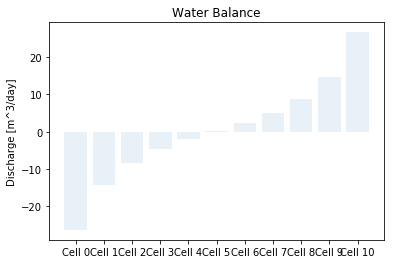

In [7]:
k = 30 #units meters/day
aquifer_thickness = 1 # units meters
discharge_cell = [0,1,2,3,4,5,6,7,8,9,10]

#Mass Balance
for waterbalance_cell in range(columns):
    discharge_cell[waterbalance_cell] = k*(model_domain[0][waterbalance_cell]-
                                           model_domain[1][waterbalance_cell])/100*(aquifer_thickness*100)
total_discharge = sum(discharge_cell)

#Percentage Error
water_budget_precentage_error = (100*total_discharge)/(sum(map(abs,discharge_cell))/2)
print(f'\nThe mass balance error is {water_budget_precentage_error}%')

#Graphing in flows and out flows
objects = ('Cell 0', 'Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Cell 9', 'Cell 10')
y_pos = [0,1,2,3,4,5,6,7,8,9,10]


plt.bar(y_pos, discharge_cell, align='center', alpha=0.1)
plt.xticks(y_pos, objects)
plt.ylabel('Discharge [m^3/day]')
plt.title('Water Balance')

plt.show()

### Part III

Add a water balance calculation to the models developed in part I and II of the lab.  Assume the hydraulic conductivity of the aquifer is 30 m/day.  Calculate the total recharge and discharge across the water table per unit width of the cross-section.  Also determine the location of the hinge point where the constant head boundary switches from recharge to discharge.  Include these water balance calculations in the Matlab codes for both Part I and II.  Please briefly answer the following questions:

1.  What are the differences in the water balance results between the two models?  

2.  Does the hinge point move when the slope of the water table is change?  Why does this occur?

### Part IV

Finally lets see what happens when we create a finer discretization.  Build a final model with 51 rows by 101 columns and a water table slope of 0.05.  Add a water balance calculation to this finer discretized model.  Please briefly answer the following questions:

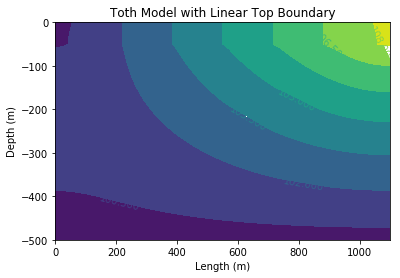

In [21]:
import numpy as np

#Defining the number of rows and columns
rows = 51
columns = 101

#buliding the model domain (I set the initial condition to 100 m to speed things up)
model_domain = 100*np.ones((rows,columns))

#This defines the top constant head boundary conditions
for top_bound in range(columns):
    model_domain[0][top_bound] = 0.05*top_bound*2 +100


#Here is where we run the model
stop = True

model_last = model_domain.copy()


while stop:
    
    for col_loc in range(1,columns-1):
        for row_loc in range (1,rows-1):
              model_domain[row_loc][col_loc] = (model_domain[row_loc - 1][col_loc] + model_domain[row_loc + 1][col_loc] + 
                                        model_domain[row_loc][col_loc - 1] + model_domain[row_loc][col_loc + 1])/4
                
    #This defines the side no flow boundaries - these must be updated ever iteration
    for side_bound in range (1,rows):
        model_domain[side_bound][0] = model_domain[side_bound][1]
        model_domain[side_bound][columns-1] = model_domain[side_bound][columns-2]

    #This defines the bottom no flow boundaries - these must be updated ever iteration
    for bottom_bound in range (columns):
        model_domain[5][bottom_bound] = model_domain[4][bottom_bound]    
                
                           
#Stopping mechanism for iteration 

    #Finding the Change in head
    delta_head = abs(model_domain-model_last)

    #This is the convergence criteria for the model
    cc = 0.000001

    #Evaluating if the convergence criteria has been met
    test_cc = (delta_head <= np.full((rows,columns),cc)).all()
    
    if test_cc:
        stop = False
    else:
        model_last = model_domain.copy()
    
model_domain

import matplotlib.pyplot as plt

#Creating a Grid to plot water levels
xlist = np.linspace(0, 1100, columns)
ylist = np.linspace(0, -500, rows)
X, Y = np.meshgrid(xlist, ylist)
Z = model_domain

#Plotting the water levels
plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, 
          fontsize=10)
plt.title('Toth Model with Linear Top Boundary')
plt.xlabel('Length (m)')
plt.ylabel('Depth (m)')
plt.show()


The mass balance error is 1.0386168020057857e-09%


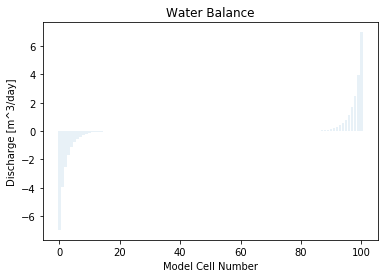

In [17]:
k = 30 #units meters/day
aquifer_thickness = 1 # units meters
discharge_cell = columns*[1]

#Mass Balance
for waterbalance_cell in range(columns):
    discharge_cell[waterbalance_cell] = k*(model_domain[0][waterbalance_cell]-
                                           model_domain[1][waterbalance_cell])/100*(aquifer_thickness*100)
total_discharge = sum(discharge_cell)

#Percentage Error
water_budget_precentage_error = (100*total_discharge)/(sum(map(abs,discharge_cell))/2)
print(f'\nThe mass balance error is {water_budget_precentage_error}%')

#Graphing in flows and out flows
plt.bar(y_pos, discharge_cell, align='center', alpha=0.1)
plt.ylabel('Discharge [m^3/day]')
plt.xlabel('Model Cell Number')
plt.title('Water Balance')

plt.show()

2.  Does the hinge point move when the slope of the water table is change?  Why does this occur?

2.  What changes did you observe in the position of the hinge line?